# Importing necessary liberaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# Reading data

In [2]:
df=pd.read_csv('datasets//1_dog_horse.csv')

In [3]:
df.shape

(200, 5)

# Dataset overview

In [4]:
df.head()

,Unnamed: 0,height,weight,target,type
0,0,27.0,71.0,0.0,dog
1,1,27.0,92.0,0.0,dog
2,2,32.0,47.0,0.0,dog
3,3,30.0,90.0,0.0,dog
4,4,28.0,91.0,0.0,dog


In [5]:
df.columns

Index(['Unnamed: 0', 'height', 'weight', 'target', 'type'], dtype='object')

# Dropping columns

In [6]:
df.drop(['Unnamed: 0','type'],axis=1,inplace=True)

In [7]:
df.isna().sum()

height    0
weight    0
target    0
dtype: int64

# Data Summary 

In [8]:
df.describe()

,height,weight,target
count,200.000000,200.000000,200.000000
mean,47.480000,106.830000,0.500000
std,18.415353,38.636836,0.501255
min,25.000000,40.000000,0.000000
25%,32.000000,80.000000,0.000000
50%,43.000000,99.000000,0.500000
75%,62.250000,141.000000,1.000000
max,84.000000,179.000000,1.000000


# Data distribution

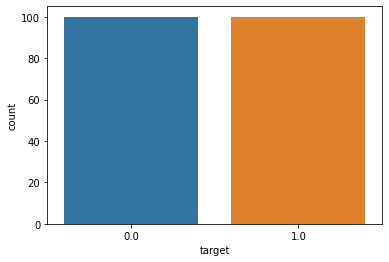

In [9]:
sns.countplot(df.target);

# Seperating Features and target variable

In [10]:
X=df.drop('target',axis=1)
y=df['target']

# Splitting Data

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling data

In [12]:
MM=MinMaxScaler()
X_train=MM.fit_transform(X_train)
X_test=MM.transform(X_test)

# Model
We have choosen the Decision tree for this particular problem there're multiple criterion are selected and each one is evaluated using different metrics

In [13]:
#Decision tree with criterion='entropy'
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train, y_train)

In [14]:
y_pred=clf.predict(X_test)

# Model Evaluation

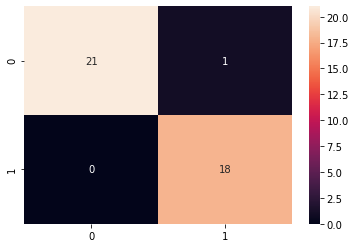

In [15]:
cm=confusion_matrix(y_pred,y_test) #confusion matrix 
sns.heatmap(cm,annot=True); #plotting

In [16]:
#classification metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('accuracy :',accuracy_score(y_pred,y_test))
print('recall :',recall_score(y_pred,y_test))
print('precision :',precision_score(y_pred,y_test))

accuracy : 0.975
recall : 1.0
precision : 0.9473684210526315


In [17]:
clf.classes_

array([0., 1.])

# Plotting Tree

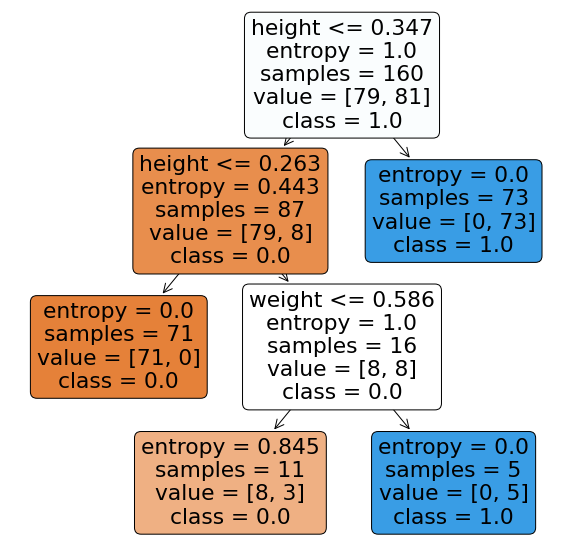

In [18]:
plt.figure(figsize=(10,10))

tree.plot_tree(
    clf, 
    filled=True,
    rounded=True,
    feature_names=["height","weight"],
    class_names=[str(x) for x in clf.classes_]
);

# 2nd Model

In [19]:
# Set max depth to 3 to make plotting the tree more visible
#Decision tree with criterion='gini'
clf2 = DecisionTreeClassifier(criterion='gini', max_depth=3).fit(X_train, y_train)

In [20]:
y_pred2=clf2.predict(X_test)

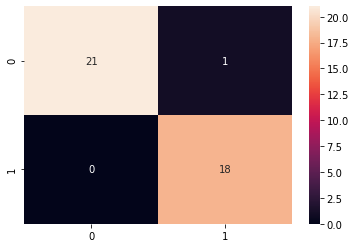

In [21]:
#confusion matrix
cm = confusion_matrix(y_pred2, y_test)
#plotting
sns.heatmap(cm,annot=True);

In [22]:
print('accuracy :', accuracy_score(y_pred2, y_test))
print('recall :', recall_score(y_pred2, y_test))
print('precision :', precision_score(y_pred2, y_test))

accuracy : 0.975
recall : 1.0
precision : 0.9473684210526315


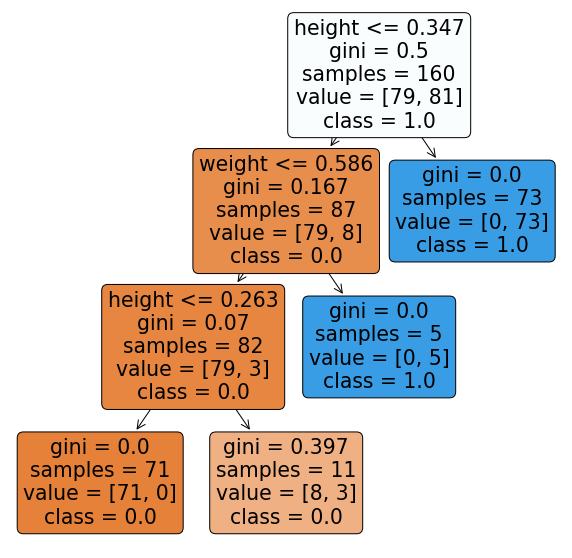

In [23]:
plt.figure(figsize= (10, 10))

tree.plot_tree(
    clf2, 
    filled=True,
    rounded=True,
    feature_names=["height","weight"],
    class_names=[str(x) for x in clf.classes_]
);

# 3rd Model

In [24]:
# Fully grown tree using Gini index as model criterion
#Decision tree without depth
clf3 = DecisionTreeClassifier(criterion = 'gini')
clf3.fit(X_train, y_train)

DecisionTreeClassifier()

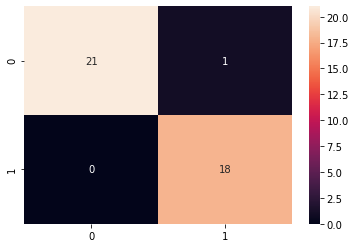

In [25]:
#prediction
y_pred3 = clf2.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_pred3, y_test)
#plotting
sns.heatmap(cm, annot=True);

In [26]:
# Classification metrics
print('accuracy :', accuracy_score(y_pred3, y_test))
print('recall :', recall_score(y_pred3, y_test))
print('precision :', precision_score(y_pred3, y_test))

accuracy : 0.975
recall : 1.0
precision : 0.9473684210526315


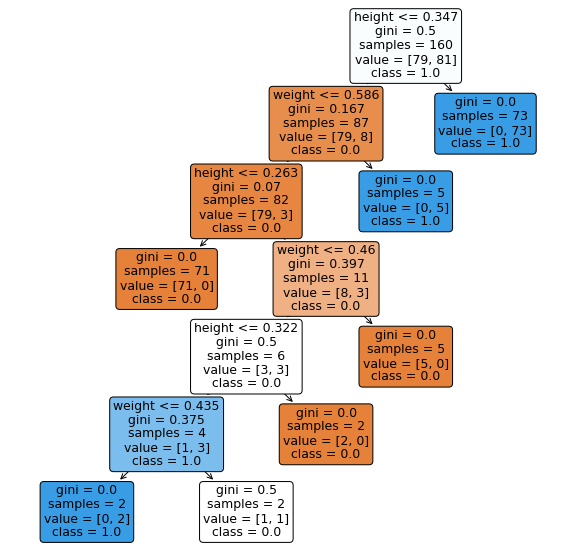

In [27]:
plt.figure(figsize = (10, 10))

tree.plot_tree(
    clf3, 
    filled=True,
    rounded=True,
    feature_names=["height","weight"],
    class_names=[str(x) for x in clf.classes_]
);